In [6]:
#The necessary packages are imported.

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
#Here we import our dataset as a csv file.
#We have extracted all the songs from the year 2016.

df = pd.read_csv("Downloads/top10s.csv")
df = df[df.year==2016]
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
363,364,The Hills,The Weeknd,canadian contemporary r&b,2016,113,56,58,-7,14,14,242,7,5,84
364,365,Love Yourself,Justin Bieber,canadian pop,2016,100,38,61,-10,28,52,234,84,44,83
365,366,Cake By The Ocean,DNCE,dance pop,2016,119,75,77,-5,4,90,219,15,5,81
366,367,Don't Let Me Down,The Chainsmokers,electropop,2016,160,87,53,-5,14,42,208,16,17,81
367,368,In the Name of Love,Martin Garrix,big room,2016,134,52,50,-6,45,17,196,11,4,81


In [8]:
#Here we scale our values for an efficient system.

sc = MinMaxScaler()
df['pop'] = sc.fit_transform(df[['pop']])
df['acous'] = sc.fit_transform(df[['acous']])
df[['pop','acous']]

,pop,acous
363,1.000000,0.070707
364,0.988095,0.848485
365,0.964286,0.151515
366,0.964286,0.161616
367,0.964286,0.111111
368,0.952381,0.020202
369,0.952381,0.202020
370,0.952381,0.494949
371,0.952381,0.111111
372,0.952381,0.292929


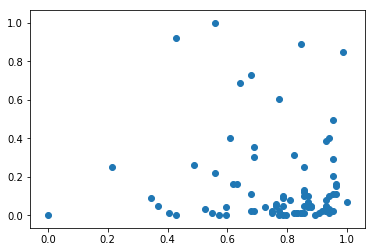

In [9]:
#We have plotted the datset as a scatter plot.

plt.scatter(df['pop'],df['acous'])

In [10]:
#Here we find the Sum of Squared Error value for each value of k  

k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['pop','acous']])
    sse.append(km.inertia_)
sse

[7.308102474901041,
 3.9803750657789556,
 2.1442709346572597,
 1.5153317032360136,
 1.177117144697712,
 0.98953481015541533,
 0.82071939989137166,
 0.62097598513049801,
 0.53962987653012906]

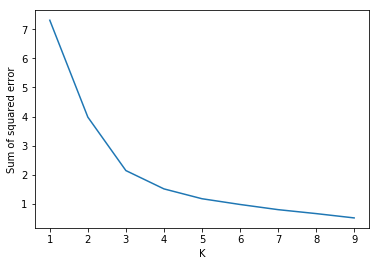

In [13]:
#We have plotted the sse values to see that at k=3 clusters, we get the optimal solution.

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [14]:
#Here we use K-Means clustering algorithm on the dataset.

km = KMeans(n_clusters=3)
km


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
y_predicted = km.fit_predict(df[['pop','acous']])
y_predicted

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2])

In [16]:
df['cluster'] = y_predicted
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,cluster
363,364,The Hills,The Weeknd,canadian contemporary r&b,2016,113,56,58,-7,14,14,242,0.070707,5,1.000000,0
364,365,Love Yourself,Justin Bieber,canadian pop,2016,100,38,61,-10,28,52,234,0.848485,44,0.988095,1
365,366,Cake By The Ocean,DNCE,dance pop,2016,119,75,77,-5,4,90,219,0.151515,5,0.964286,0
366,367,Don't Let Me Down,The Chainsmokers,electropop,2016,160,87,53,-5,14,42,208,0.161616,17,0.964286,0
367,368,In the Name of Love,Martin Garrix,big room,2016,134,52,50,-6,45,17,196,0.111111,4,0.964286,0


Text(0,0.5,'acous')

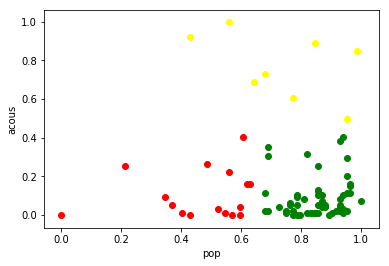

In [17]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0['pop'],df0['acous'],color='green')
plt.scatter(df1['pop'],df1['acous'],color='yellow')
plt.scatter(df2['pop'],df2['acous'],color='red')

plt.xlabel('pop')
plt.ylabel('acous')


In [18]:
#This is one of the clusters which can be a playlist.

df2[['title','pop','acous']]


,title,pop,acous
425,Make Me... (feat. G-Eazy),0.630952,0.161616
426,Keeping Your Head Up,0.619048,0.161616
427,True Colors,0.607143,0.404040
428,Make Me Like You,0.595238,0.040404
429,Champagne Problems,0.595238,0.000000
430,Blown,0.571429,0.000000
432,Pep Rally,0.559524,0.222222
433,Higher,0.547619,0.010101
434,Invitation,0.523810,0.030303
435,One Call Away (feat. Tyga) - Remix,0.488095,0.262626
